In [3]:
import pandas as pd

# lakeFS credentials from your docker-compose.yml
ACCESS_KEY = "access_key"
SECRET_KEY = "secret_key"

# lakeFS endpoint (running locally)
lakefs_endpoint = "http://lakefs-dev:8000/"

# lakeFS repository, branch, and file path
repo = "weather"
branch = "main"
path = "weather.parquet"

# Construct the full lakeFS S3-compatible path
lakefs_s3_path = f"s3a://{repo}/{branch}/{path}"

# Configure storage_options for lakeFS (S3-compatible)
storage_options = {
    "key": ACCESS_KEY,
    "secret": SECRET_KEY,
    "client_kwargs": {
        "endpoint_url": lakefs_endpoint
    }
}
path_all_partition = 's3a://weather/main/weather.parquet'
df2=pd.read_parquet(    
    path=path_all_partition,
    storage_options=storage_options
)
df2.info()
df2.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype                       
---  ------               --------------  -----                       
 0   timestamp            16 non-null     datetime64[ns]              
 1   minute               16 non-null     int64                       
 2   created_at           16 non-null     datetime64[ns, Asia/Bangkok]
 3   requested_province   16 non-null     object                      
 4   location             16 non-null     object                      
 5   weather_main         16 non-null     object                      
 6   weather_description  16 non-null     object                      
 7   main.temp            16 non-null     float64                     
 8   year                 16 non-null     category                    
 9   month                16 non-null     category                    
 10  day                  16 non-null     cat

,timestamp,minute,created_at,requested_province,location,weather_main,weather_description,main.temp,year,month,day,hour
0,2025-05-01 14:36:10.083743,36,2025-05-01 14:54:10.083722+07:00,Pathum Thani,Pathum Thani,Clouds,scattered clouds,30.55,2025,5,1,14
1,2025-05-01 14:36:10.511841,36,2025-05-01 14:54:10.511822+07:00,Bangkok,Pathum Wan,Clouds,overcast clouds,32.80,2025,5,1,14
2,2025-05-01 14:36:11.145828,36,2025-05-01 14:54:11.145807+07:00,Chiang Mai,Chiang Mai,Clouds,few clouds,29.97,2025,5,1,14
3,2025-05-01 14:36:11.633539,36,2025-05-01 14:54:11.633518+07:00,Phuket,Kathu,Clouds,scattered clouds,24.92,2025,5,1,14
4,2025-05-01 14:35:54.356668,35,2025-05-01 14:53:54.348488+07:00,Pathum Thani,Pathum Thani,Clouds,scattered clouds,30.55,2025,5,1,14


array([[<Axes: title={'center': 'timestamp'}>,
        <Axes: title={'center': 'minute'}>],
       [<Axes: title={'center': 'created_at'}>,
        <Axes: title={'center': 'main.temp'}>]], dtype=object)

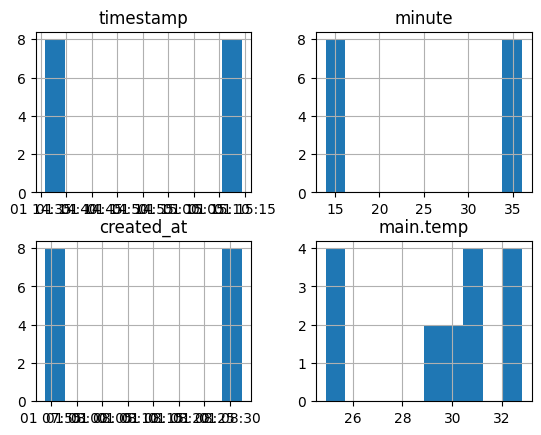

In [4]:
df2.hist()